# Script SAE15 - Traiter des données




---


Nom : CHIBANE

Prénom : Ilies

Groupe de TP : GP-IA & IA2S


---



# **DEBUT DE CODE : SAE15 - TRAITER DES DONNEES**
## PARTIE 1 : IMPORTATIONS, INSTALLATIONS ET CONFIGURATIONS
## PARTIE 2 : RECUPERATION DES DONNEES VELIB EN OPENDATA
## PARTIE 3 : MISE SOUS FORME DE DATAFRAME
## PARTIE 4 : ANALYSES STATISTIQUES
## PARTIE 5 : EXPORTATION DES MESURES STATISTIQUES POUR LE WEB
## PARTIE 6 : SPATIALISATION DES DONNEES, EXPORTATION POUR LE WEB

In [1]:
####################################################################
# PARTIE 1 : IMPORTATIONS, INSTALLATIONS ET CONFIGURATION          #
####################################################################
# modules natifs à importer
from google.colab import drive  # pour l'accès au drive
import sys                      # pour l'accès au commandes système
import json                     # pour manipuler le format JSON
import pandas as pd             # pour extraire, calculer, publier
import matplotlib.pyplot as plt # pour les graphes

#-------------------------------------------------------------------
# modules externes à installer et à importer
!pip install geopandas
!pip install contextily

import geopandas as gpd        # pour la spatialisation des données
import contextily as ctx       # pour l'utilisation de cartes géographiques

#-------------------------------------------------------------------
# montage du drive
drive.mount('/content/drive', force_remount=True)
#-------------------------------------------------------------------
# modules internes à importer
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/SAE15/tools')
import sae15_tools as tools
import sae15_spec as spec
####################################################################

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 20.1 MB/s eta 0:00:00
Mounted at /content/drive


In [35]:
####################################################################
# PARTIE 2 : RECUPERATION DES DONNEES VELIB EN OPENDATA            #
####################################################################
# récupération des données statiques (données d'information)
static_json_data = tools.loadVelibInformation()
#-------------------------------------------------------------------
# récupération des données dynamiques (données de status)
dynamic_json_data = tools.loadVelibStatus()
####################################################################

In [36]:
####################################################################
# PARTIE 3 : MISE SOUS FORME DE DATAFRAME                          #
####################################################################
# dataframe de l'information pour les stations
info_stations = tools.getVelibStations(static_json_data)
df_info_stations = pd.DataFrame.from_dict(info_stations)
#-------------------------------------------------------------------
# dataframe du status pour les stations
statu_stations = tools.getVelibStations(dynamic_json_data)
df_statu_stations = pd.DataFrame.from_dict(statu_stations)
#-------------------------------------------------------------------
# fusion des deux DataFrames en un seul (merge)
merged_df = pd.merge(df_info_stations, df_statu_stations, on=['station_id', 'stationCode'])
# affichage du résultat
merged_df
####################################################################

station_id                                   name        lat       lon  \
0       213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1       653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2     17278902806             Rouget de L'isle - Watteau  48.778193  2.396302   
3           36255                     Toudouze - Clauzel  48.879296  2.337360   
4        37815204                        Mairie du 12ème  48.840855  2.387555   
...           ...                                    ...        ...       ...   
1464     54000604                 Ordener - Poissonniers  48.891214  2.351289   
1465     43247738                     Ruisseau - Ordener  48.892995  2.340145   
1466    102311820                 Clignancourt - Ordener  48.891458  2.348636   
1467    368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1468    315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode rental_methods  num_bikes_available  \
0           35       16107            NaN                    7   
1           30       31104   [CREDITCARD]                   18   
2           20       44015            NaN                    2   
3           21        9020   [CREDITCARD]                    2   
4           30       12109            NaN                    5   
...        ...         ...            ...                  ...   
1464        35       18023   [CREDITCARD]                    4   
1465        35       18026   [CREDITCARD]                    1   
1466        35       18024   [CREDITCARD]                    2   
1467        25       42004   [CREDITCARD]                   35   
1468        67        8004   [CREDITCARD]                   70   

      numBikesAvailable            num_bikes_available_types  \
0                     7    [{'mechanical': 3}, {'ebike': 4}]   
1                    18   [{'mechanical': 4}, {'ebike': 14}]   
2                     2    [{'mechanical': 1}, {'ebike': 1}]   
3                     2    [{'mechanical': 0}, {'ebike': 2}]   
4                     5    [{'mechanical': 3}, {'ebike': 2}]   
...                 ...                                  ...   
1464                  4    [{'mechanical': 2}, {'ebike': 2}]   
1465                  1    [{'mechanical': 0}, {'ebike': 1}]   
1466                  2    [{'mechanical': 0}, {'ebike': 2}]   
1467                 35   [{'mechanical': 31}, {'ebike': 4}]   
1468                 70  [{'mechanical': 37}, {'ebike': 33}]   

      num_docks_available  numDocksAvailable  is_installed  is_returning  \
0                      28                 28             1             1   
1                      11                 11             1             1   
2                      18                 18             1             1   
3                      19                 19             1             1   
4                      23                 23             1             1   
...                   ...                ...           ...           ...   
1464                   31                 31             1             1   
1465                   29                 29             1             1   
1466                   30                 30             1             1   
1467                    5                  5             1             1   
1468                    2                  2             1             1   

      is_renting  last_reported  
0              1     1701961685  
1              1     1701961842  
2              1     1701962012  
3              1     1701961977  
4              1     1701961811  
...          ...            ...  
1464           1     1701962009  
1465           1     1701961582  
1466           1     1701962004  
1467           1     1701961990  
1468           1     1701962012  

[1469 rows x 16 columns]

In [34]:
def get_type_bikes(merged_df):
  meca = []
  ebike = []
  for bikes_types in merged_df["num_bikes_available_types"].to_numpy():
    meca.append(bikes_types[0]["mechanical"])
    ebike.append( bikes_types[1]["ebike"])

  merged_df["mechanical"] = meca
  merged_df["ebike"] = ebike

  return merged_df

In [38]:
####################################################################
# PARTIE 4 : ANALYSES STATISTIQUES                                 #
####################################################################
# mesures statistiques sur la capacité des stations
stats_capacity = spec.stationStatistics(merged_df["capacity"])
#-------------------------------------------------------------------
# mesures statistiques sur les vélos disponibles
stats_velo_dispo = spec.stationStatistics(merged_df["num_bikes_available"])
#-------------------------------------------------------------------
# mesures statistiques sur les stands disponibles
stats_stand_dispo = spec.stationStatistics(merged_df["num_docks_available"])
#-------------------------------------------------------------------
merged_df = get_type_bikes(merged_df)

# mesures statistiques sur les vélos mécaniques (optionnel)
stats_velo_meca = spec.stationStatistics(merged_df["mechanical"])
#-------------------------------------------------------------------
# mesures statistiques sur les vélos électriques (optionnel)
stats_velo_elec = spec.stationStatistics(merged_df["ebike"])
#-------------------------------------------------------------------
# assemblage des toutes les statistiques dans un seul DataFrame
df_stat = []

row_1 = {"":"Capacité"}
row_1.update(stats_capacity)
df_stat.append(row_1)

row_2 = {"":"Vélos disponible"}
row_2.update(stats_velo_dispo)
df_stat.append(row_2)

row_3 = {"":"Stands disponible"}
row_3.update(stats_stand_dispo)
df_stat.append(row_3)

row_4 = {"":"Vélos mécanique disponible"}
row_4.update(stats_velo_meca)
df_stat.append(row_4)

row_5 = {"":"Vélos électrique disponible"}
row_5.update(stats_velo_elec)
df_stat.append(row_5)

df_stat = pd.DataFrame.from_dict(df_stat)
#-------------------------------------------------------------------
# affichage dans la console du DataFrame des statistiques assemblées
display(df_stat)
####################################################################

mean  count        std  min  max
0                     Capacité  31.038802   1469  12.031770    0   74
1             Vélos disponible  10.875425   1469  11.903283    0   85
2            Stands disponible  19.108918   1469  12.765506    0   63
3   Vélos mécanique disponible   6.765827   1469   9.336192    0   59
4  Vélos électrique disponible   4.109598   1469   4.520567    0   33

In [40]:
####################################################################
# PARTIE 5 : EXPORTATION DES MESURES STATISTIQUES POUR LE WEB      #
####################################################################
# mise en forme du DataFrame des statistiques avant exportation
df_stat.rename(columns={
    'mean': 'Moyenne',
    'count': 'Nombre',
    'std': 'Ecart_type',
    'min': 'Minimum',
    'max': 'Maximum'
}, inplace=True)
#-------------------------------------------------------------------
# exportation du DataFrame des statistiques au format HTML
spec.exportStatistics(df_stat, "stats.html")
####################################################################

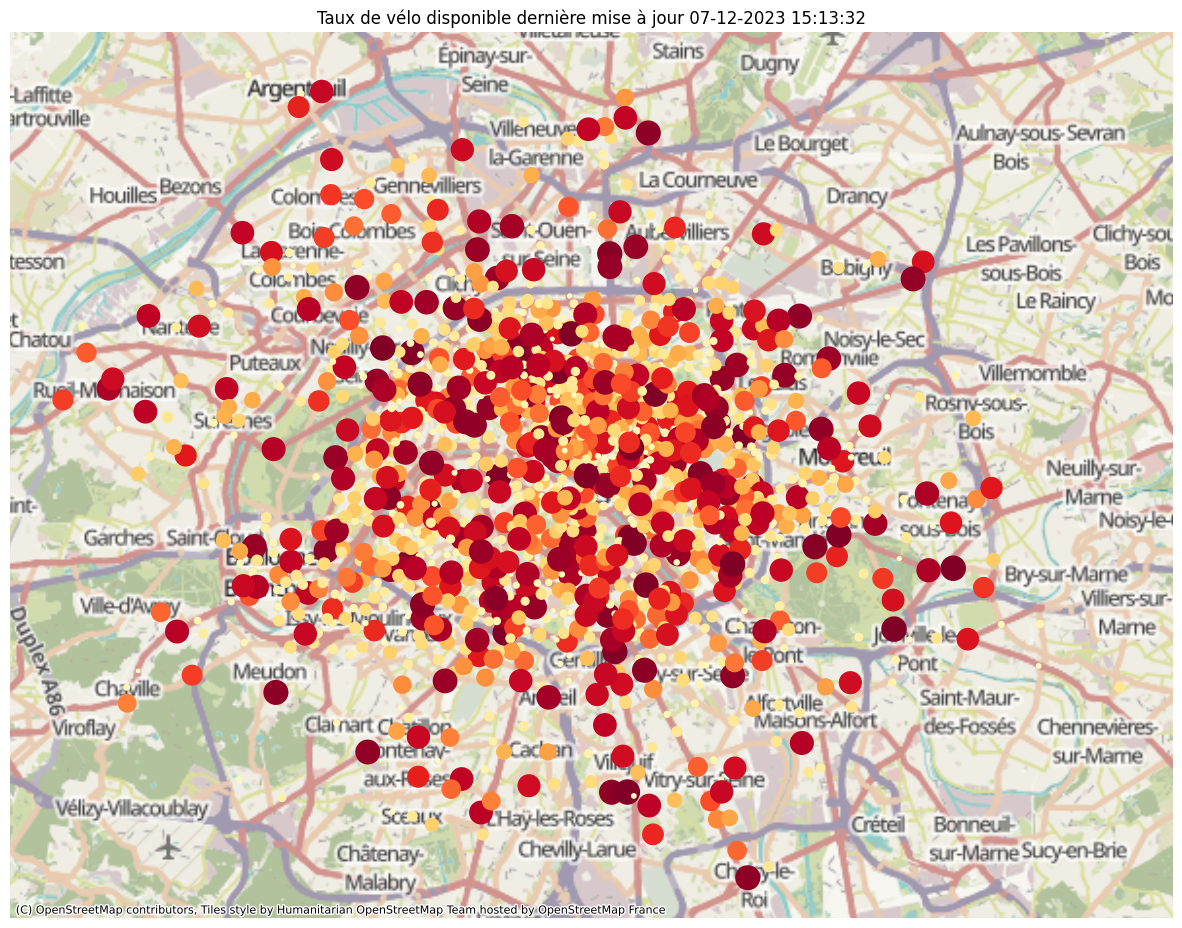

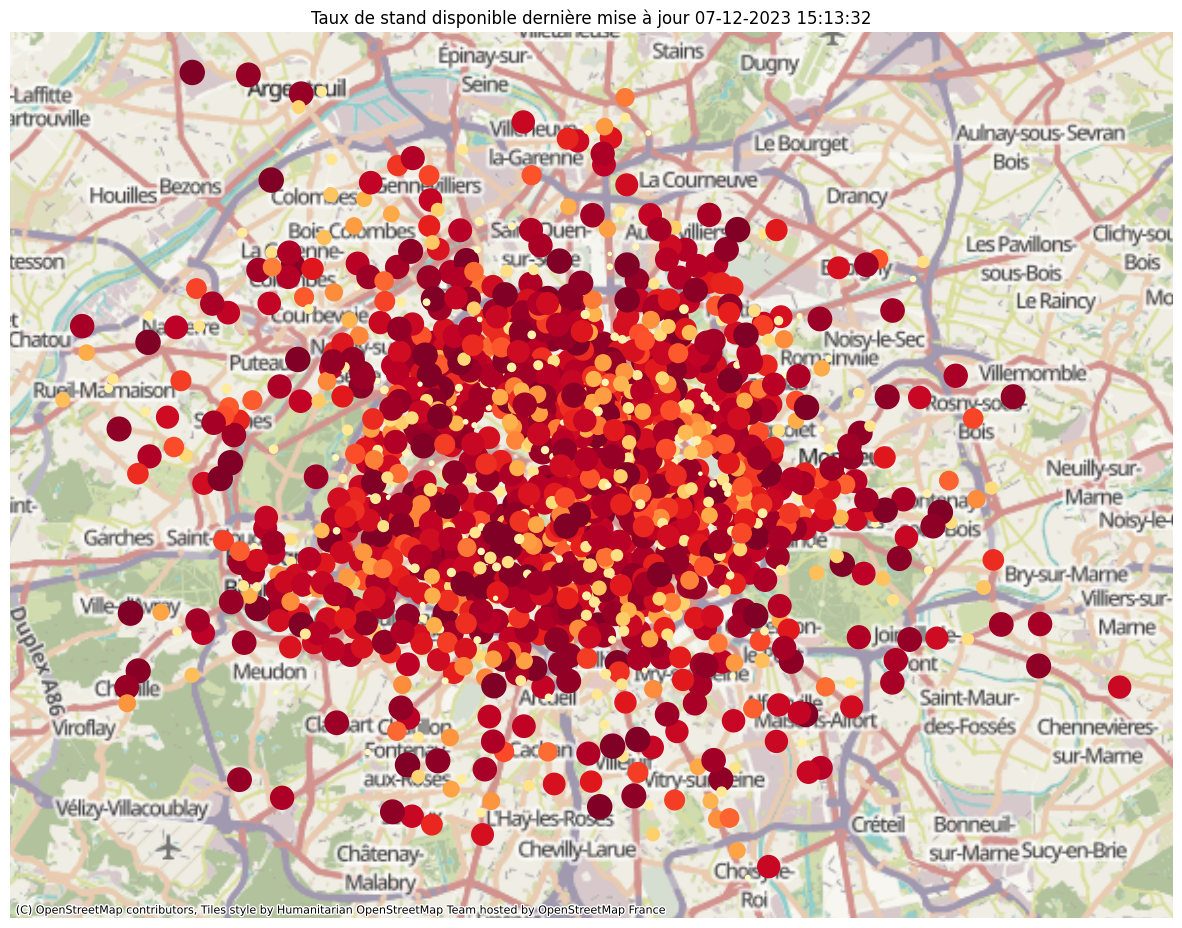

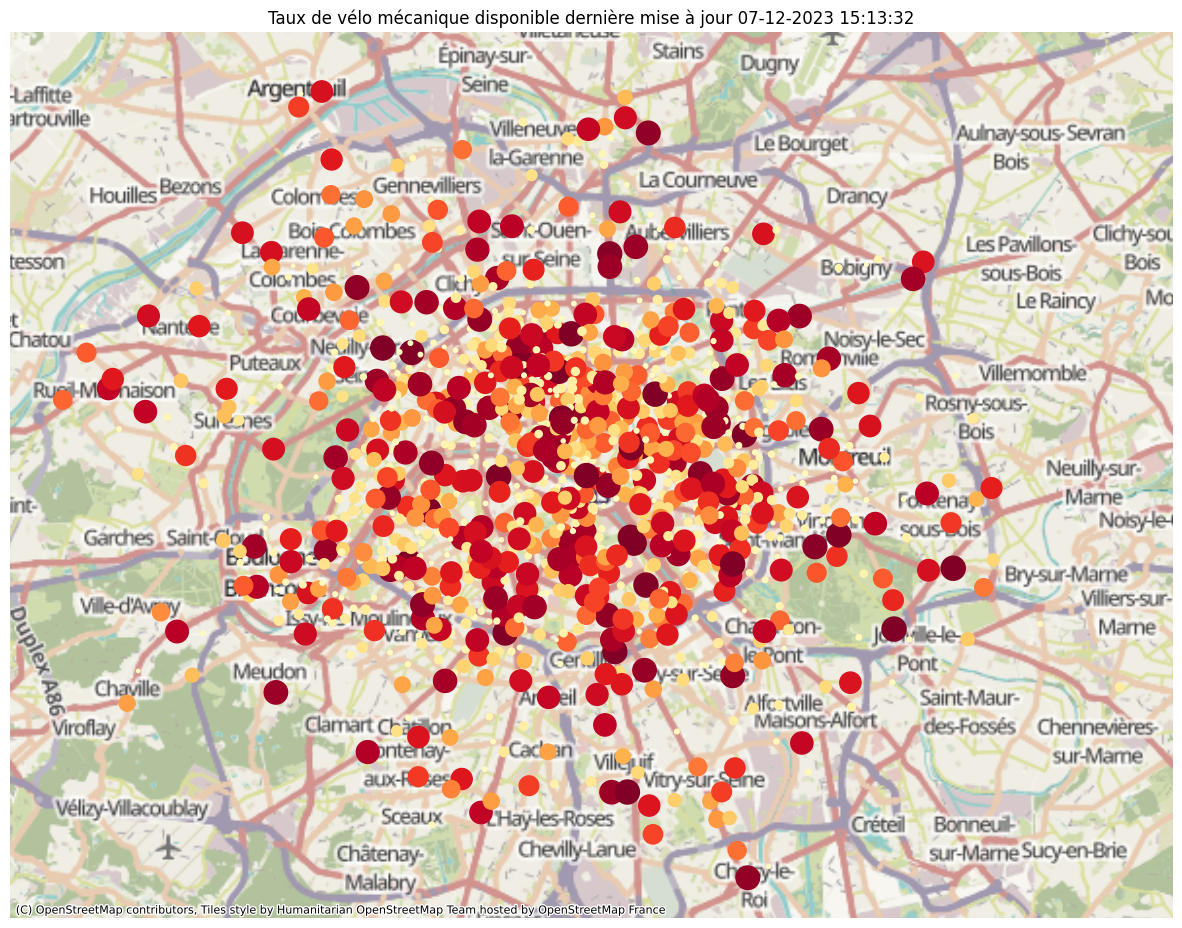

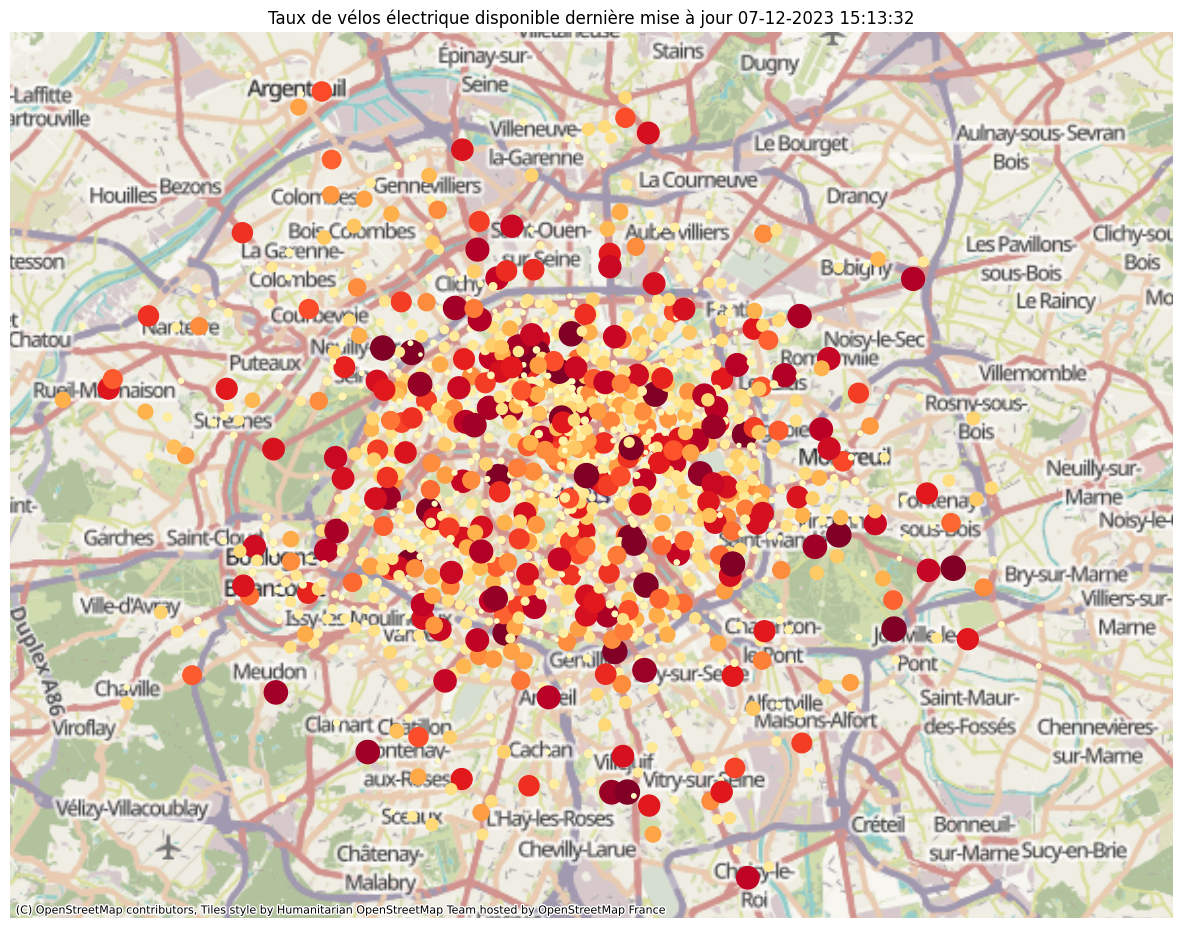

In [48]:
####################################################################
# PARTIE 6 : SPATIALISATION DES DONNEES, EXPORTATION POUR LE WEB   #
####################################################################
# transformation du DataFrame des stations Vélib en GeoDataFrame
geo_data = tools.exportToGeoDF(merged_df)
#-------------------------------------------------------------------
# détermination de la dernière date de mise à jour des données
date = spec.getLatestDate(geo_data)
#-------------------------------------------------------------------
# carte du taux de disponibilité des vélos avec date de mise à jour
# et export web de la carte
filaname = '/content/drive/My Drive/Colab Notebooks/SAE15/web/data/taux de vélo disponible'+str(date.iloc[-1])+"svg"
geo_data["taux_velo"] = pd.Series(spec.availableBikesRate(geo_data)).tolist()
spec.exportCityMap(geo_data, geo_data.taux_velo, "YlOrRd", "Taux de vélo disponible", date.iloc[-1], filename=filaname)
#-------------------------------------------------------------------
# carte du taux de disponibilité des stands avec date de mise à jour
# et export web de la carte
filaname = '/content/drive/My Drive/Colab Notebooks/SAE15/web/data/taux de stand disponible'+str(date.iloc[-1])+"svg"
geo_data["taux_stand"] = pd.Series(spec.availableDocksRate(geo_data)).tolist()
spec.exportCityMap(geo_data, geo_data.taux_stand, "YlOrRd", "Taux de stand disponible", date.iloc[-1], filename=filaname)
#-------------------------------------------------------------------
# carte du taux de disponibilité des vélos mécaniques (optionnel)
# et export web de la carte
filaname = '/content/drive/My Drive/Colab Notebooks/SAE15/web/data/taux de vélo mécanique disponible'+str(date.iloc[-1])+"svg"
geo_data["taux_velos_mecaniques"] = ((geo_data.groupby(['stationCode'])['mechanical'].sum() / (geo_data.groupby(['stationCode'])['mechanical'].sum() + geo_data.groupby(['stationCode'])['numDocksAvailable'].sum())).fillna(0) * 100).to_list()
spec.exportCityMap(geo_data, geo_data.taux_velos_mecaniques, "YlOrRd", "Taux de vélo mécanique disponible", date.iloc[-1], filename=filaname)
#-------------------------------------------------------------------
# carte du taux de disponibilité des vélos électriques (optionnel)
# et export web de la carte
filaname = '/content/drive/My Drive/Colab Notebooks/SAE15/web/data/taux de vélos électrique disponible'+str(date.iloc[-1])+"svg"
geo_data["taux_velos_electriques"] = ((geo_data.groupby(['stationCode'])['ebike'].sum() / (geo_data.groupby(['stationCode'])['ebike'].sum() + geo_data.groupby(['stationCode'])['numDocksAvailable'].sum())).fillna(0) * 100).to_list()
spec.exportCityMap(geo_data, geo_data.taux_velos_electriques, "YlOrRd", "Taux de vélos électrique disponible", date.iloc[-1], filename=filaname)
####################################################################

In [ ]:
####################################################################
# FIN DE CODE : VERIFIER LA PUBLICATION SUR LE WEB                 #
####################################################################

https://ilies-chibane-sea15.github.io